In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [3]:
#load breast cancer data
BreastData = load_breast_cancer()

#X Data
X = BreastData.data
#print('X Data is \n' , X[:10])
#print('X shape is ' , X.shape)
#print('X Features are \n' , BreastData.feature_names)

#y Data
y = BreastData.target
#print('y Data is \n' , y[:100])
#print('y shape is ' , y.shape)
#print('y Columns are \n' , BreastData.target_names)

#----------------------------------------------------
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22, shuffle =True)

#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)


X_train shape is  (455, 30)
X_test shape is  (114, 30)
y_train shape is  (455,)
y_test shape is  (114,)


In [4]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [5]:
RandomForest = RandomForestClassifier(n_estimators=2, criterion='gini', max_depth=100, random_state=22)
SVM = SVC(C=1.0, kernel='rbf', degree=3, gamma= 'auto',max_iter=60, random_state= 44)
KNN =  KNeighborsClassifier(n_neighbors=2, weights='uniform', algorithm='auto')
TreeDecision = DecisionTreeClassifier(criterion='gini', splitter = 'best', max_depth=4, random_state=33)

In [6]:
dict_of_models = {'RandomForest': RandomForest,
                  'SVM': SVM,
                  'KNN': KNN,
                  'Tree':TreeDecision
                 }

In [7]:
def model_score(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    print(model.score(x_train, y_train))
    y_pred = model.predict(X_test)
    print(f"les 10 true values de test est {y_test[:30]} ")
    print(f"les 10 predictions values est  {y_pred[:30]} ")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

RandomForest---------------------------------------------------------------------------------------- 
0.9714285714285714
les 10 true values de test est [1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1] 
les 10 predictions values est  [0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1] 
[[42  1]
 [ 5 66]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        43
           1       0.99      0.93      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114

SVM------------------------------------------------------------------------------------------------- 
0.9406593406593406
les 10 true values de test est [1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1] 
les 10 predictions values est  [1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1] 
[[33 10]
 [ 4 67]]
              pre

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=60).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=60).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=60).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=60).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=60).  Con

KNN------------------------------------------------------------------------------------------------- 
0.9626373626373627
les 10 true values de test est [1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1] 
les 10 predictions values est  [1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1] 
[[39  4]
 [ 7 64]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        43
           1       0.94      0.90      0.92        71

    accuracy                           0.90       114
   macro avg       0.89      0.90      0.90       114
weighted avg       0.91      0.90      0.90       114

Tree------------------------------------------------------------------------------------------------ 
0.9846153846153847
les 10 true values de test est [1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1] 
les 10 predictions values est  [1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1] 
[[37  6]
 [ 4 67]]
              pre

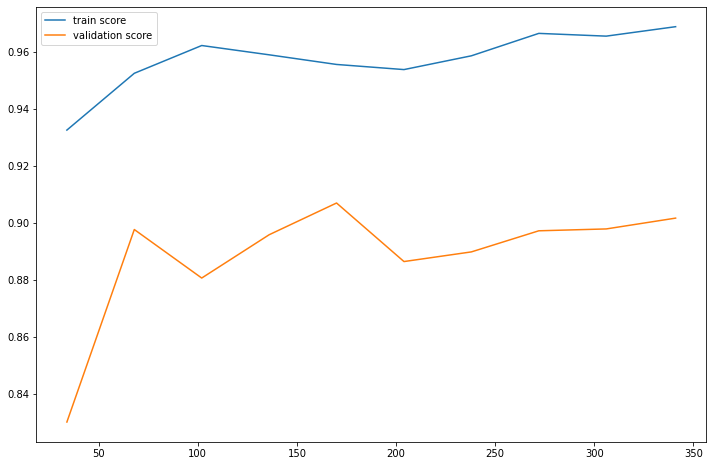

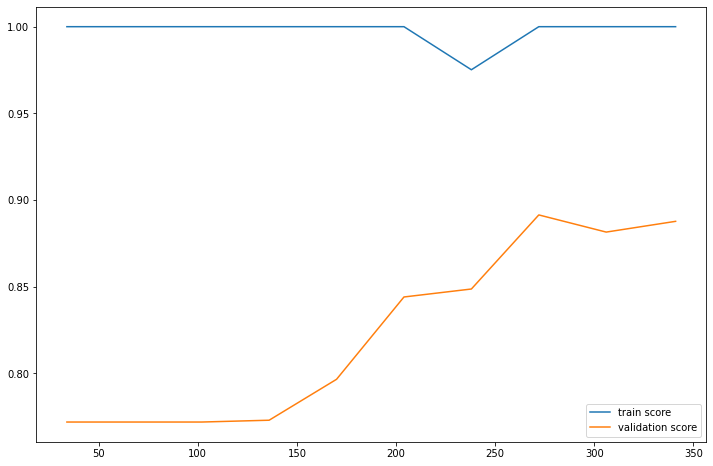

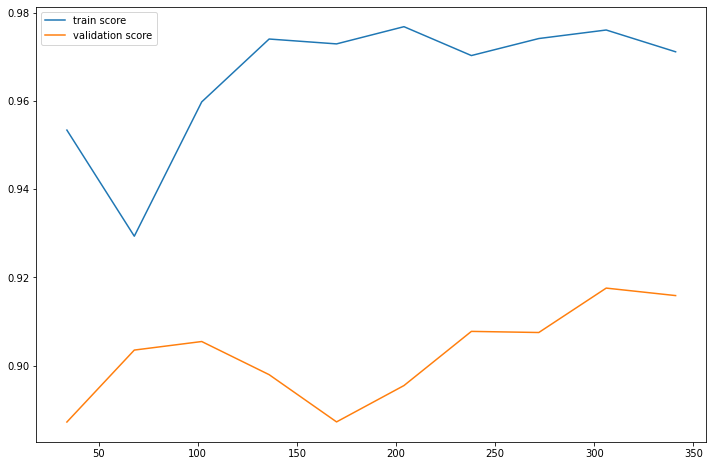

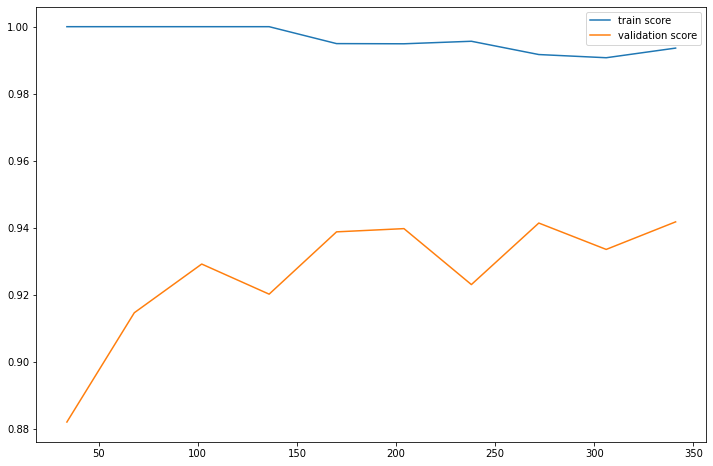

In [9]:
for name, model in dict_of_models.items():
    print(f'{name:-<100} ')
    model_score(model, X_train, y_train, X_test, y_test)
  

In [14]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [15]:
hyper_params = {'kernel':('linear', 'rbf'), 'C':[1,2,3,4,5]}

In [16]:
svm_c = SVC(random_state=22)

In [17]:
grid = RandomizedSearchCV(svm_c, hyper_params, scoring='recall', cv=4,
                          n_iter=40)

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 10 is smaller than n_iter=40. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


{'kernel': 'rbf', 'C': 1}
              precision    recall  f1-score   support

           0       0.97      0.81      0.89        43
           1       0.90      0.99      0.94        71

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.93      0.92      0.92       114



In [21]:
treee = DecisionTreeClassifier(criterion='gini', splitter = 'best', max_depth=5, random_state=33)
treee.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=33)

In [22]:
from sklearn.tree import export_graphviz
export_graphviz(treee, out_file="tree.dot", class_names=["malignant", "benign"],
 feature_names=BreastData.feature_names, impurity=False, filled=True)

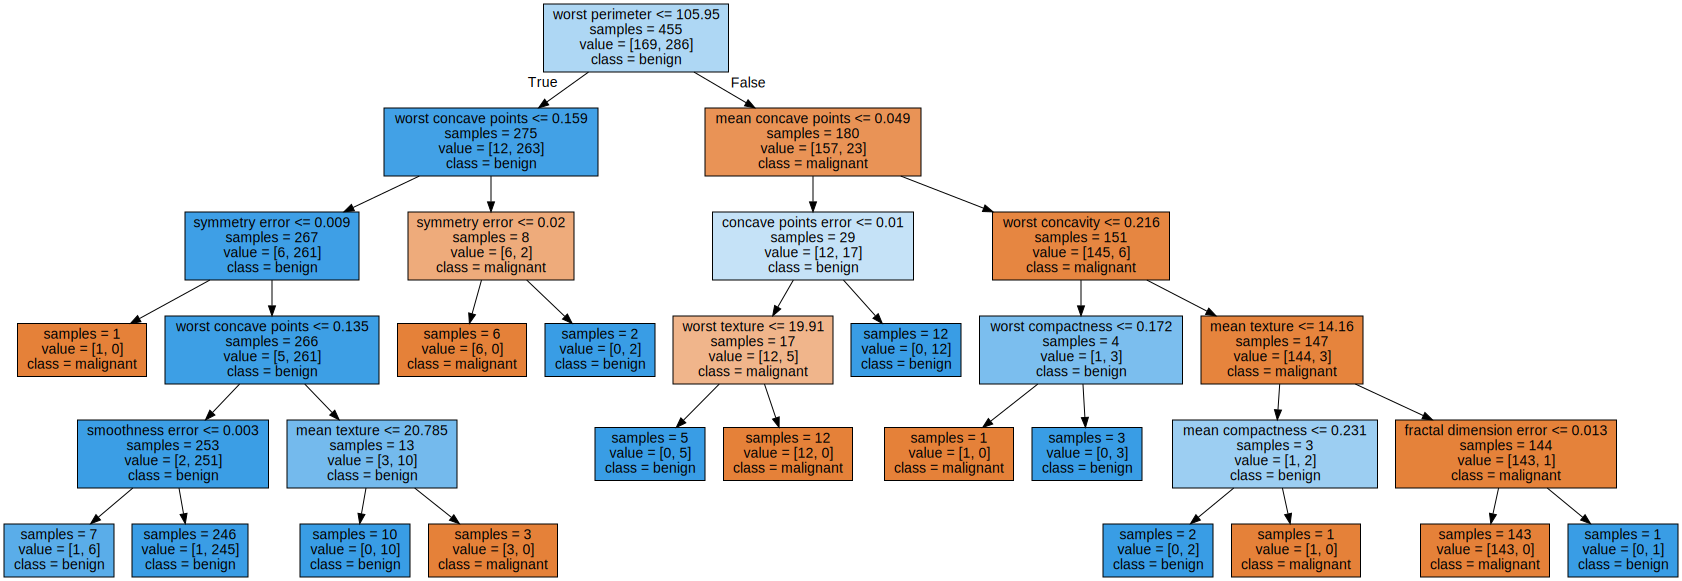

In [23]:
import graphviz
with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)
